# Acsf3: Only the controls were used for the overall analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
gene = 'Acsf3'

In [3]:
manual = pd.read_csv(gene + '_manual_annotation.csv')
pd.set_option('display.max_columns', None)
manual

,mouse_id,strain,sex,genotype,type,bw,EF_manual,FS_manual,LVIDd_manual,LVIDs_manual
0,30515573,C57BL/6N,f,control,wt (Acsf3),20.9,91.28,60.77,2.55,1.01
1,30516135,C57BL/6N,m,control,wt (Acsf3),30.4,81.82,49.75,3.22,1.65
2,30516136,C57BL/6N,m,control,wt (Acsf3),29.1,74.31,42.20,3.23,2.00


In [4]:
filtered_data = pd.read_csv(gene + '_data_filtered_plus_functional_parameter_plus_manual_measurements.csv')
filtered_data

,mouse_id,file,LVIDd_auto,LVIDd_auto_time,LVIDs_auto,LVIDs_auto_time,heart_rate_auto,heart_rate_auto_time,LVIDd_auto_quality_label,LVIDd_auto_quality_flag,LVIDs_auto_quality_label,LVIDs_auto_quality_flag,LV_Vold_auto,LV_Vols_auto,EF_auto,FS_auto,strain,sex,genotype,type,bw,EF_manual,FS_manual,LVIDd_manual,LVIDs_manual,dif_LVIDd,mean_LVIDd,dif_LVIDs,mean_LVIDs,dif_EF,dif_FS
0,30516135,Acsf3_1vX_9.dcm,2.972093,0.019167,1.217733,0.068333,765.957447,0.019167,0.563026,high,0.563026,high,34.209105,3.493955,89.786476,59.027778,C57BL/6N,m,control,wt (Acsf3),30.4,81.82,49.75,3.22,1.65,-0.247907,3.096047,-0.432267,1.433866,7.966476,9.277778
1,30516135,Acsf3_1vX_9.dcm,3.467442,0.097500,1.155814,0.167500,615.384615,0.097500,0.563026,high,0.563026,high,49.736682,3.039645,93.888526,66.666667,C57BL/6N,m,control,wt (Acsf3),30.4,81.82,49.75,3.22,1.65,0.247442,3.343721,-0.494186,1.402907,12.068526,16.916667
2,30516135,Acsf3_1vX_9.dcm,3.611919,0.195000,1.135174,0.249167,576.000000,0.195000,0.563026,high,0.563026,high,54.865433,2.896510,94.720702,68.571429,C57BL/6N,m,control,wt (Acsf3),30.4,81.82,49.75,3.22,1.65,0.391919,3.415959,-0.514826,1.392587,12.900702,18.821429
3,30516135,Acsf3_1vX_9.dcm,3.859593,0.873333,1.898837,0.913333,571.428571,0.873333,0.975178,high,0.975178,high,64.294893,11.148341,82.660612,50.802139,C57BL/6N,m,control,wt (Acsf3),30.4,81.82,49.75,3.22,1.65,0.639593,3.539797,0.248837,1.774419,0.840612,1.052139
4,30516135,Acsf3_1vX_9.dcm,3.611919,0.978333,1.836919,1.022500,521.739130,0.978333,0.975178,high,0.975178,high,54.865433,10.240417,81.335393,49.142857,C57BL/6N,m,control,wt (Acsf3),30.4,81.82,49.75,3.22,1.65,0.391919,3.415959,0.186919,1.743459,-0.484607,-0.607143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,30516136,Acsf3_1vX_1.dcm,2.806977,3.903333,1.630523,4.035833,692.307692,3.903333,0.798315,high,0.798315,high,29.732323,7.528659,74.678539,41.911765,C57BL/6N,m,control,wt (Acsf3),29.1,74.31,42.20,3.23,2.00,-0.423023,3.018488,-0.369477,1.815262,0.368539,-0.288235
192,30516136,Acsf3_1vX_1.dcm,2.848256,3.990000,1.589244,4.125000,712.871287,3.990000,0.798315,high,0.737942,high,30.819105,7.043351,77.146154,44.202899,C57BL/6N,m,control,wt (Acsf3),29.1,74.31,42.20,3.23,2.00,-0.381744,3.039128,-0.410756,1.794622,2.836154,2.002899
193,30516136,Acsf3_1vX_1.dcm,3.054651,4.074167,1.382849,4.197500,672.897196,4.074167,0.798315,high,0.737942,high,36.577660,4.893315,86.622121,54.729730,C57BL/6N,m,control,wt (Acsf3),29.1,74.31,42.20,3.23,2.00,-0.175349,3.142326,-0.617151,1.691424,12.312121,12.529730
194,30516136,Acsf3_1vX_1.dcm,2.889535,4.163333,1.382849,4.281667,705.882353,4.163333,0.737942,high,0.737942,high,31.927461,4.893315,84.673648,52.142857,C57BL/6N,m,control,wt (Acsf3),29.1,74.31,42.20,3.23,2.00,-0.340465,3.059767,-0.617151,1.691424,10.363648,9.942857


In [5]:
mice_manual = np.unique(manual['mouse_id'])
mice_automatic = np.unique(filtered_data['mouse_id'])
mice_manual==mice_automatic

array([ True,  True,  True])

## Differences between automatic and manual measurements

In [6]:
sns.set_style("whitegrid")
colors1="Spectral"
colors2="tab:red"

### Overview per line

<AxesSubplot:xlabel='mouse_id', ylabel='LVIDs_manual'>

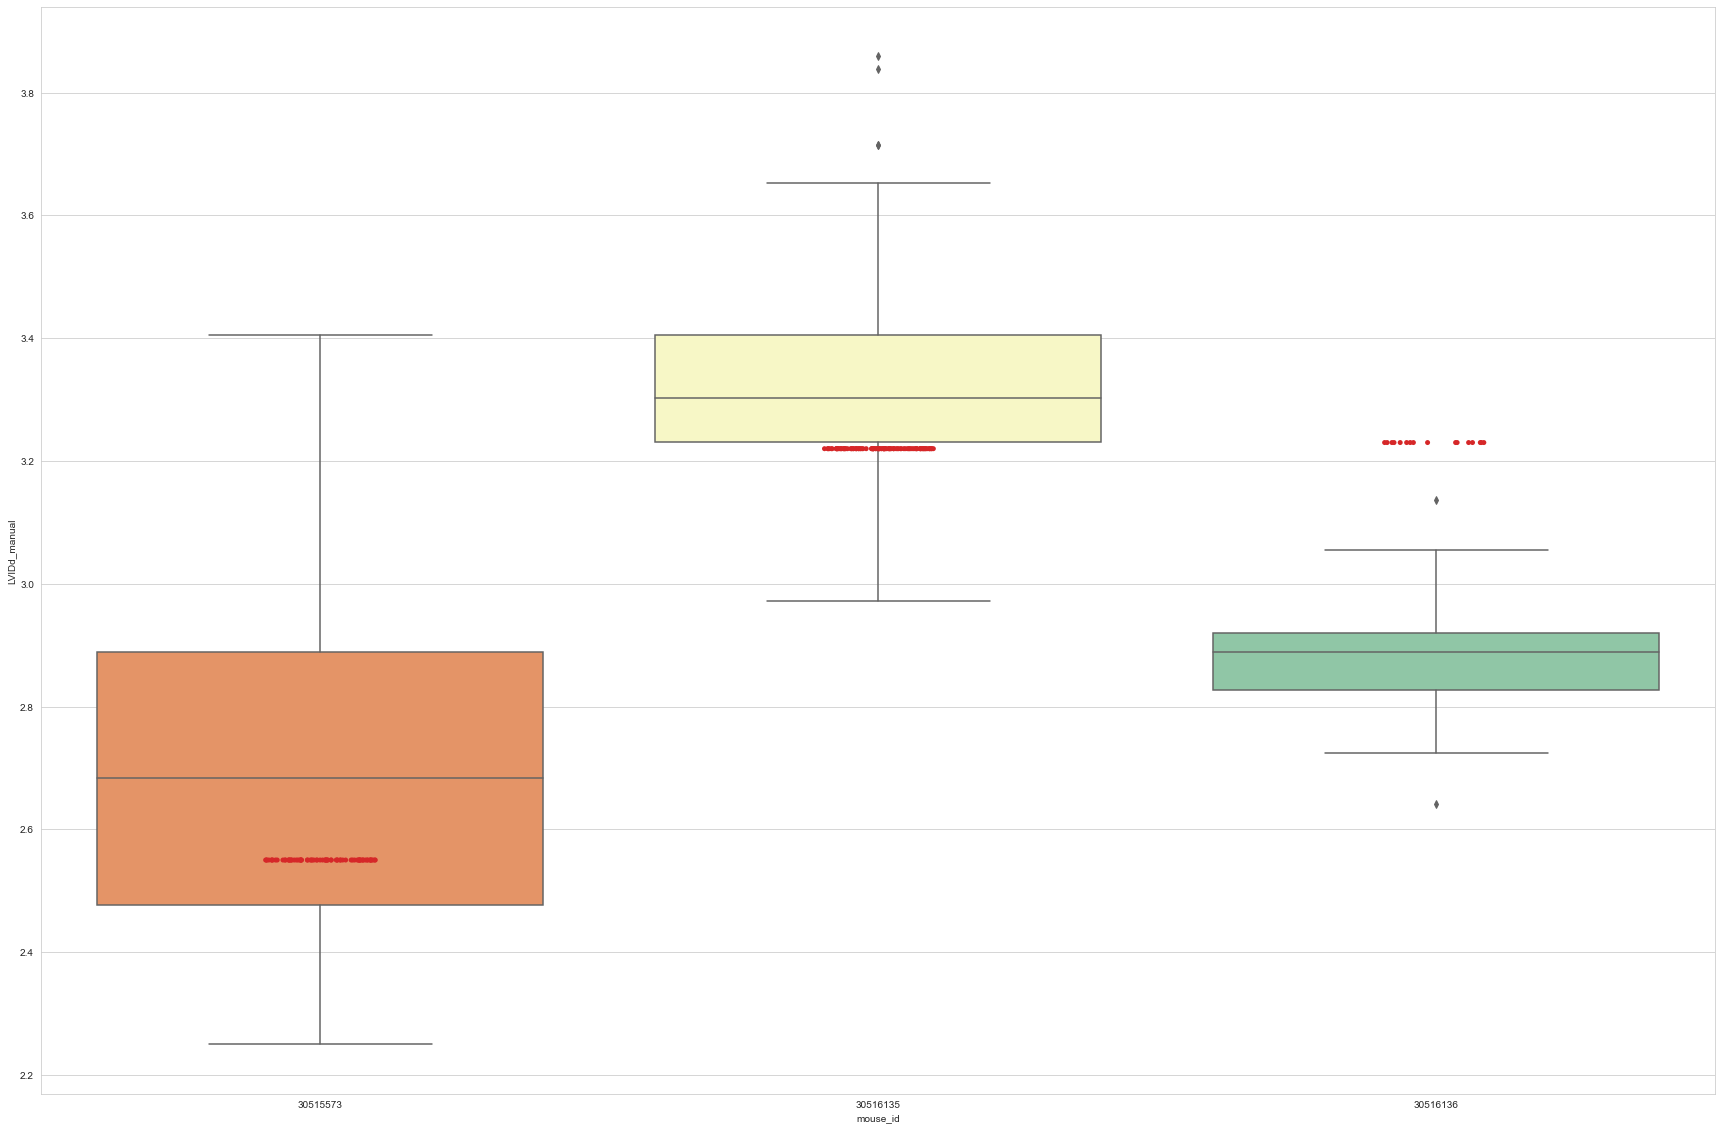

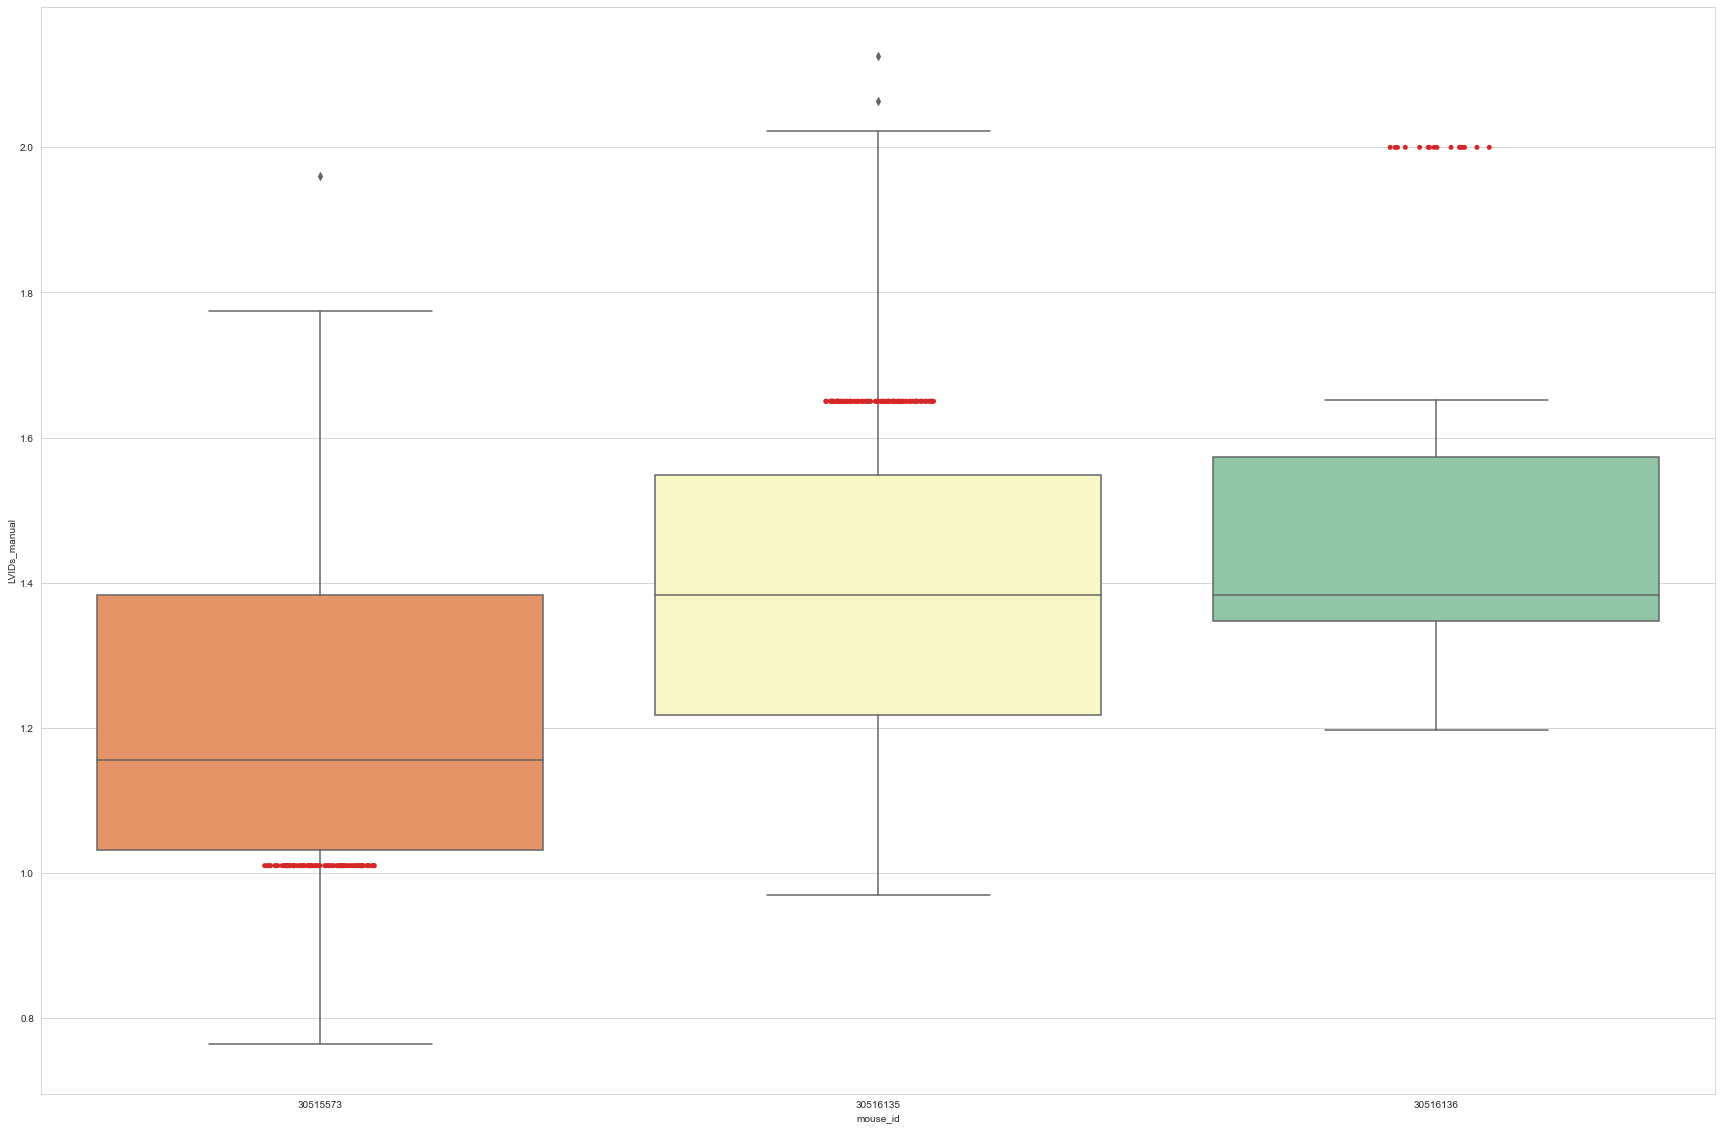

In [7]:
fig = plt.subplots(figsize= (30,20))
sns.boxplot(data=filtered_data,  x="mouse_id", y="LVIDd_auto", palette=colors1)
sns.stripplot(data= filtered_data, x = "mouse_id", y = "LVIDd_manual", color=colors2)

fig = plt.subplots(figsize= (30,20))
sns.boxplot(data=filtered_data,  x="mouse_id", y="LVIDs_auto", palette=colors1)
sns.stripplot(data= filtered_data, x = "mouse_id", y = "LVIDs_manual", color=colors2)

### Overview per mouse per parameter

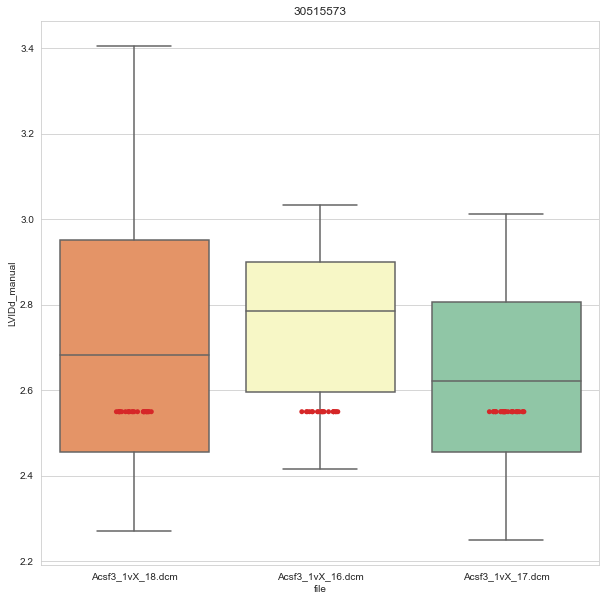

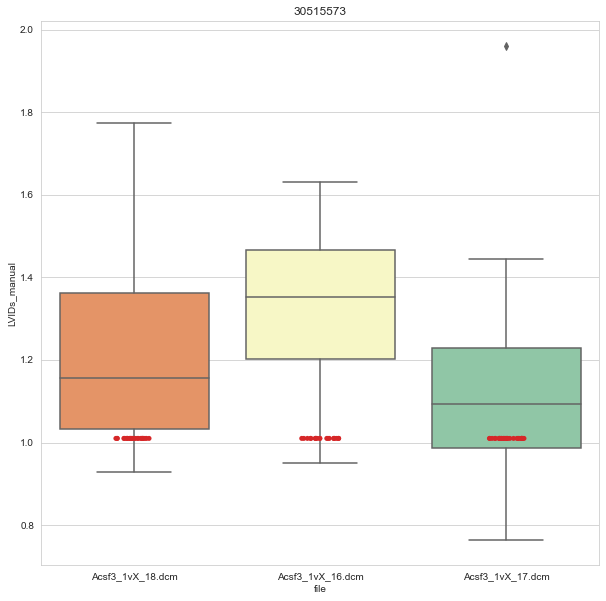

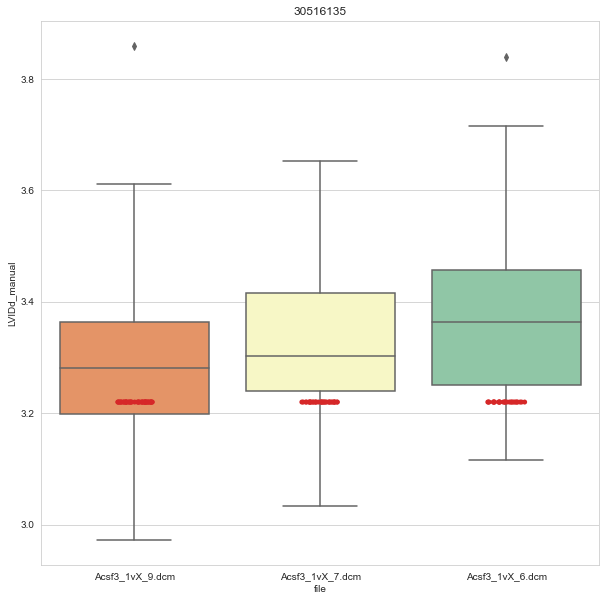

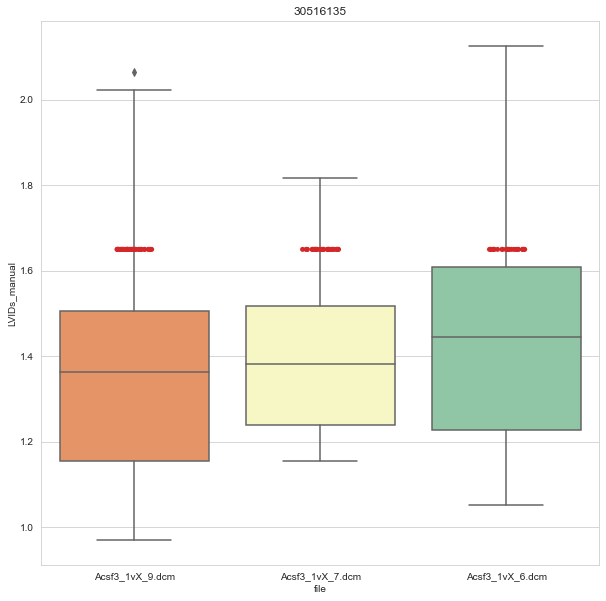

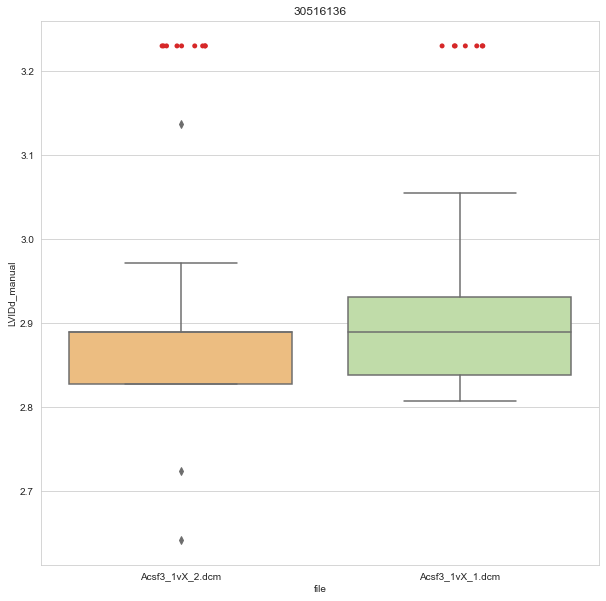

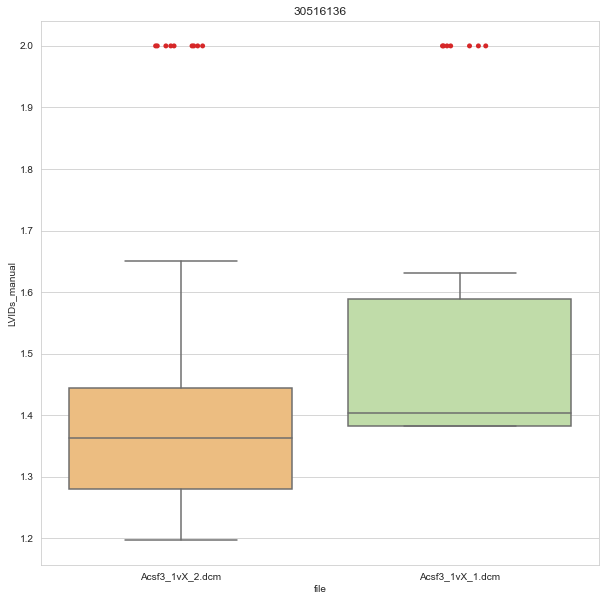

In [8]:
for mouse in mice_automatic:
    fig = plt.subplots(figsize= (10,10))
    sns.boxplot(data=filtered_data[filtered_data['mouse_id'] == mouse],  x="file", y="LVIDd_auto", palette=colors1)
    sns.stripplot(data= filtered_data[filtered_data['mouse_id'] == mouse], x = "file", y = "LVIDd_manual", color=colors2)
    plt.title(mouse)

    fig = plt.subplots(figsize= (10,10))
    sns.boxplot(data=filtered_data[filtered_data['mouse_id'] == mouse],  x="file", y="LVIDs_auto", palette=colors1)
    sns.stripplot(data= filtered_data[filtered_data['mouse_id'] == mouse], x = "file", y = "LVIDs_manual", color=colors2)
    plt.title(mouse)

## Image quality

In [9]:
image_quality = pd.read_csv("../image_quality_all_files.csv")
image_quality = image_quality[image_quality['mouse_id'].isin(mice_manual)]
image_quality

,mouse_id,file_name,high_image_quality,low_image_quality
90,30515573,Acsf3_1vX_16,37.050360,62.949640
91,30515573,Acsf3_1vX_18,58.231968,41.768032
92,30515573,Acsf3_1vX_17,57.649477,42.350523
93,30516135,Acsf3_1vX_9,89.414183,10.585817
94,30516135,Acsf3_1vX_7,73.530923,26.469077
95,30516135,Acsf3_1vX_6,57.649477,42.350523
96,30516136,Acsf3_1vX_1,20.606372,79.393628
97,30516136,Acsf3_1vX_3,0.000000,100.000000
98,30516136,Acsf3_1vX_2,31.762892,68.237108


### Image quality per mouse

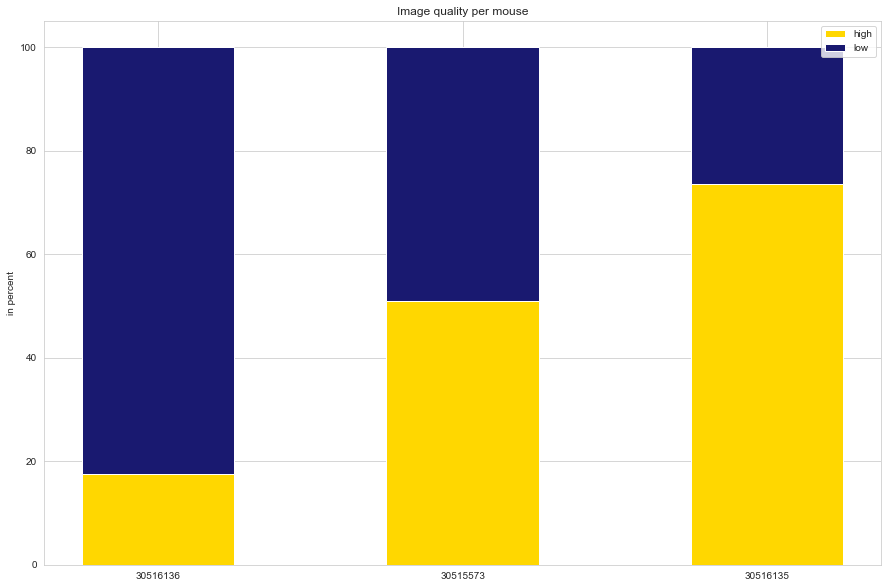

In [10]:
image_quality_mouse = image_quality.groupby(by = ['mouse_id']).mean().reset_index()
image_quality_mouse['mouse_id'] = image_quality_mouse['mouse_id'].astype(str)
image_quality_mouse.sort_values(by=['high_image_quality'], inplace = True)
labels = image_quality_mouse['mouse_id']
good_parts = image_quality_mouse['high_image_quality']
bad_parts = image_quality_mouse['low_image_quality']
width = 0.5   

fig, ax = plt.subplots(figsize=(15,10))

ax.bar(labels, good_parts, width, label='high', color='gold')
ax.bar(labels, bad_parts, width, bottom = good_parts, label='low', color='midnightblue')

ax.set_ylabel('in percent')
ax.set_title('Image quality per mouse')
ax.legend()

plt.show()

### Image quality per line

In [11]:
image_quality = pd.DataFrame([[image_quality['high_image_quality'].describe()['mean'],
                             image_quality['low_image_quality'].describe()['mean']]], 
                             index = [gene],
                             columns= ['high image quality', 'low image quality'])
image_quality = image_quality.round(2)
image_quality

,high image quality,low image quality
Acsf3,47.32,52.68


## Calculation of stats

In [12]:
# LVIDs diastole 
lvidd_stats = filtered_data[['dif_LVIDd']].describe()
lvidd_stats.rename(columns = {'dif_LVIDd': 'diff LVIDd'}, inplace=True)

In [13]:
# LVIDs systole
lvids_stats = filtered_data[['dif_LVIDs']].describe()
lvids_stats.rename(columns = {'dif_LVIDs': 'diff LVIDs'}, inplace=True)

In [14]:
# Ejection Fraction
ef_stats = filtered_data[['dif_EF']].describe()
ef_stats.rename(columns={'dif_EF':'diff ejection fraction'}, inplace=True)

In [15]:
# Fractional Shortening
fs_stats = filtered_data[['dif_FS']].describe()
fs_stats.rename(columns={'dif_FS':'diff fractional shortening'}, inplace=True)

In [16]:
stats_df = pd.concat([lvidd_stats,
                      lvids_stats,
                      ef_stats,
                      fs_stats
                     ],axis=1)
df = pd.DataFrame([[len(np.unique(filtered_data['mouse_id'])),
                    len(np.unique(filtered_data['mouse_id'])),
                    len(np.unique(filtered_data['mouse_id'])),
                    len(np.unique(filtered_data['mouse_id']))]], 
                  index = ['number of mice'],columns= stats_df.columns)
stats_df = stats_df.append(df)
stats_df.rename(index={'count':'number of measurements'}, inplace=True)
stats_df = stats_df.round(2)
stats_df

,diff LVIDd,diff LVIDs,diff ejection fraction,diff fractional shortening
number of measurements,196.00,196.00,196.00,196.00
mean,0.08,-0.11,1.93,2.74
std,0.24,0.34,9.09,10.68
min,-0.59,-0.80,-41.59,-37.13
25%,-0.06,-0.41,-1.85,-2.52
50%,0.07,-0.12,3.53,4.38
75%,0.24,0.13,9.06,10.42
max,0.86,0.95,15.04,21.59
number of mice,3.00,3.00,3.00,3.00


In [17]:
# Creation of subgroups
f_man = manual[manual['sex'] == 'f']
m_man = manual[manual['sex'] == 'm']

In [18]:
means_auto = filtered_data.groupby(by = ['mouse_id', 'sex', 'genotype', 'type']).mean().reset_index()
means_auto_f = means_auto[means_auto['sex'] == 'f']
means_auto_m = means_auto[means_auto['sex'] == 'm']

In [19]:
num_stats = pd.DataFrame(
    [[len(f_man[f_man['genotype'] == 'control']),
      len(means_auto_f[means_auto_f['genotype'] == 'control'])],
     [len(m_man[m_man['genotype'] == 'control']),
      len(means_auto_m[means_auto_m['genotype'] == 'control'])
    ]],
    index = ['f', 'm'], 
    columns = ['man con', 'auto con']
)
num_stats

,man con,auto con
f,1,1
m,2,2


In [20]:
image_quality.to_csv(gene + '_image_quality_per_line.csv')
num_stats.to_csv(gene + '_number_of_mice.csv')